<h1><center style="color: red"> FUNDAMENTALS OF AIR POLLUTION (CVEN-5325-01)</center></h1> 

<h2> <center style="color: red"> Mini-Project 1: Atmosphere Energy Balances </h2></center>

**Load the necessary libraries**

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os
import pandas as pd

<h2 style="color: red;">Problem 1</h2>


<li> Compute and plot global average concentrations as a function of carbon dioxide concentrations in the atmosphere assuming quasi-equilibrium conditions.  Use the data from $CO_2$ measurements from Mauna Loa in Hawaii.</li>  


**The code loads CO2 data, processes it to calculate expected temperature changes using a logarithmic model, and visualizes the results in a line plot.**

DataFrame columns: Index(['year', 'month', 'average'], dtype='object')
   year  month  average
0  1979      1   336.56
1  1979      2   337.29
2  1979      3   337.88
3  1979      4   338.32
4  1979      5   338.26


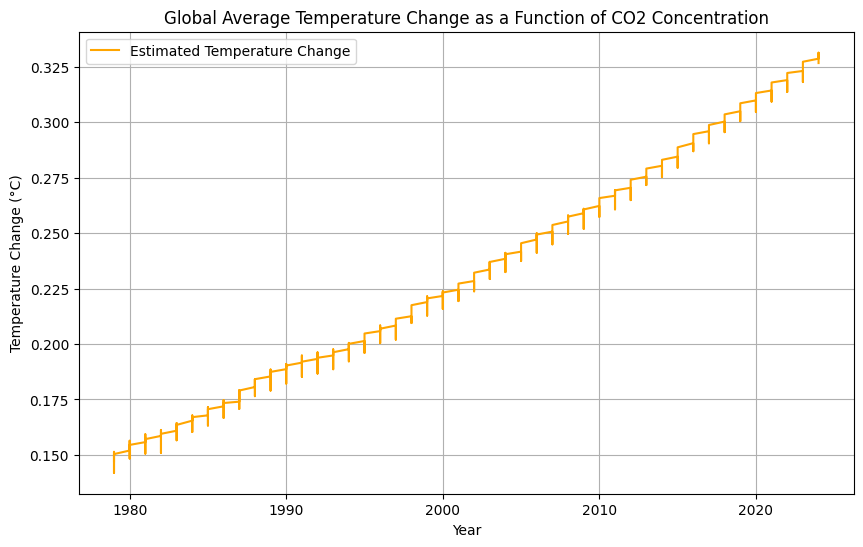

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Mauna Loa CO2 data
data_path = r"C:\Users\Prabin-PC\Downloads\Fundamentals of Air Pollution\CO2average.csv"
data = pd.read_csv(data_path)

# Check the data structure
print("DataFrame columns:", data.columns)  # Print column names
print(data.head())  # Print the first few rows of the DataFrame

# Strip leading/trailing spaces from column names, if necessary
data.columns = data.columns.str.strip()

# Ensure the expected column names are correct
# Replace 'co2' with the actual name if it's different
if 'average' not in data.columns:
    print("Column 'co2' not found. Available columns are:", data.columns)
else:
    # Extract the relevant columns
    years = data['year']
    co2_concentration = data['average']

    # Ensure co2_concentration is in ppm and positive
    co2_concentration = co2_concentration[co2_concentration > 0]

    # Calculate global average temperature response (simple logarithmic model)
    C0 = 280  # ppm (reference CO2 level, e.g., pre-industrial)
    lambda_value = 0.8  # °C per doubling of CO2 (example value)

    # Calculate temperature changes based on CO2 levels
    temperature_change = lambda_value * np.log(co2_concentration / C0)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(years[:len(temperature_change)], temperature_change, label='Estimated Temperature Change', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Temperature Change (°C)')
    plt.title('Global Average Temperature Change as a Function of CO2 Concentration')
    plt.grid(True)
    plt.legend()
    plt.show()

<h2 style="color: red;">Problem 2</h2>

<li> Obtain the estimates of $CO_2$ prior to the industrial revolution.  See How the global and latitudinal temperature has changed over time.  State the sources of your data and information </li>

**Let us consider the case where CO₂ emissions increase by 1% year-over-year from the preindustrial value [CO2] = 280 ppm, starting at T=T₀=14°C 
in year t=0 and with a timestep Δt = 1 year.**

**Source: https://www.co2.earth/co2-ice-core-data**

**Source: https://berkeleyearth.org/global-temperature-report-for-2023/**

**The code calculates the average CO2 levels for each year from 1851 to 1900 across all countries using the `pandas` library. It loads data from a CSV file named `PreIndustrialCO2Data`, which contains columns for country names, years, and CO2 values. After filtering the dataset to include only the relevant years, the code groups the data by year and computes the average CO2 for each year. The results are then saved to a new CSV file, `average_co2_per_year_1851_1900.csv`, allowing for a clear examination of historical CO2 levels during this period.**

In [27]:
# Load your CSV file
file_path = r"C:\Users\Prabin-PC\Downloads\Fundamentals of Air Pollution\PreIndustrialCO2Data.csv"
data = pd.read_csv(file_path)


# Filter the data for the years 1851 to 1900
filtered_data = data[(data['YEAR'] >= 1851) & (data['YEAR'] <= 1900)]

# Calculate the average CO2 for each year
average_co2_per_year = filtered_data.groupby('YEAR')['CO2'].mean().reset_index()

# Rename the columns for clarity
average_co2_per_year.columns = ['YEAR', 'AVERAGE_CO2']

# Display the first few rows of the dataframe to understand its structure
print(average_co2_per_year.head(10))

# Save the result to a new CSV file
average_co2_per_year.to_csv(r'C:\Users\Prabin-PC\Downloads\Fundamentals of Air Pollution\average_co2_per_year_1851_1900.csv', index=False)

print("Average CO2 data per year has been saved to 'average_co2_per_year_1851_1900.csv'")

   YEAR  AVERAGE_CO2
0  1851    29.052736
1  1852    30.291189
2  1853    31.626981
3  1854    37.235038
4  1855    29.908866
5  1856    40.330566
6  1857    40.688019
7  1858    31.267329
8  1859    33.122729
9  1860    33.998280
Average CO2 data per year has been saved to 'average_co2_per_year_1851_1900.csv'


**The code loads environmental data and visualizes the trends in CO2 levels and global temperatures over time through line plots.**

To analyze global CO2 levels from 1851 to 1900, I first downloaded the comprehensive CO2 data for all countries during this period. Using Python, I processed this data by loading it into a DataFrame and filtering for the specified years while addressing any missing values. I then calculated the average CO2 concentration for this timeframe, storing the result as CO2AvgWorld. Alongside this, I ensured alignment with global temperature data from the same era, labeling it as GlobalTemperatureWorld.

   YEAR  AVERAGE_CO2
0  1851    29.052736
1  1852    30.291189
2  1853    31.626981
3  1854    37.235038
4  1855    29.908866
----------------------------------------------------------------------------------------------------
   Year  Temperature (°C)  Temperature_in_Kelvin
0  1851             13.59                 286.74
1  1852             13.61                 286.76
2  1853             13.59                 286.74
3  1854             13.56                 286.71
4  1855             13.61                 286.76


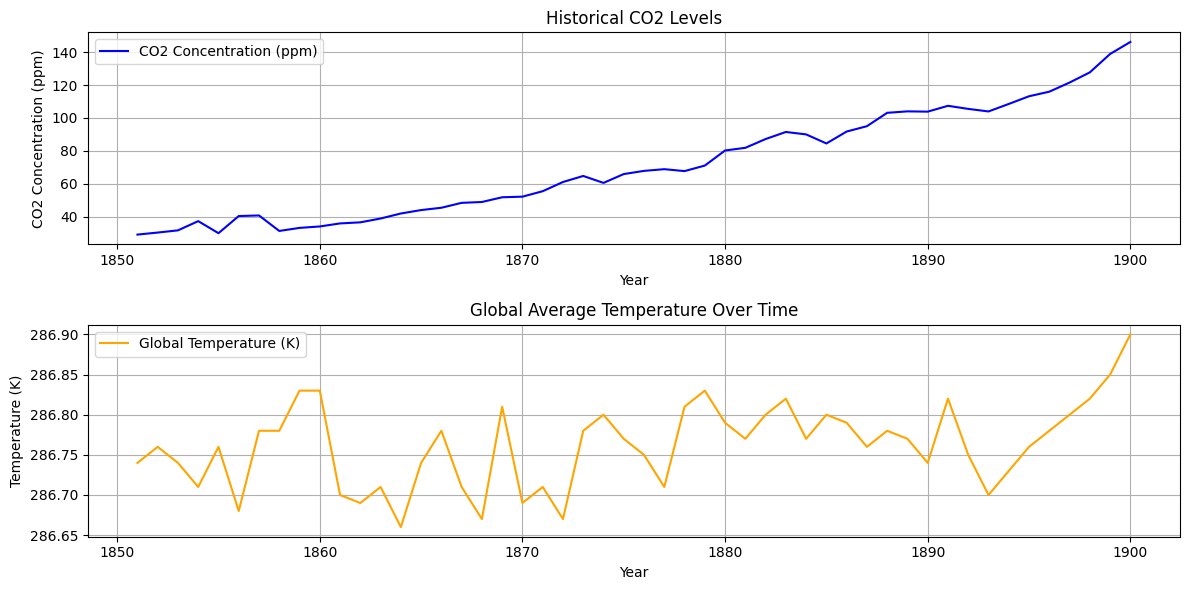

In [52]:
# Load the CO2 and temperature data directly using the full file path
co2_path = r'C:\Users\Prabin-PC\Downloads\Fundamentals of Air Pollution\CO2AvgWorld.csv'
temp_path = r'C:\Users\Prabin-PC\Downloads\Fundamentals of Air Pollution\GlobalTemperatureChange.csv'

# Read the CSV files into DataFrames with a specified encoding
averageco2 = pd.read_csv(co2_path, encoding='ISO-8859-1')  # Change the encoding if necessary
globaltemperature = pd.read_csv(temp_path, encoding='ISO-8859-1')  # Change the encoding if necessary

# Display the first few rows of each DataFrame (optional)
print(averageco2.head())  # Check the CO2 data
print("-" * 100)  # Line break
print(globaltemperature.head())  # Check the temperature data

# Plot CO2 data
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(averageco2['YEAR'], averageco2['AVERAGE_CO2'], label='CO2 Concentration (ppm)', color='blue')  # Use AVERAGE_CO2
plt.title('Historical CO2 Levels')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.grid(True)
plt.legend()

# Plot temperature data
plt.subplot(2, 1, 2)
plt.plot(globaltemperature['Year'], globaltemperature['Temperature_in_Kelvin'], label='Global Temperature (K)', color='orange')  # Use Temperature_in_Kelvin
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**The code snippet begins by merging two DataFrames, averageco2 and globaltemperature, based on the YEAR and Year columns, resulting in a new DataFrame called merged_data. This merging facilitates the analysis of the relationship between average CO2 levels and global temperatures.**

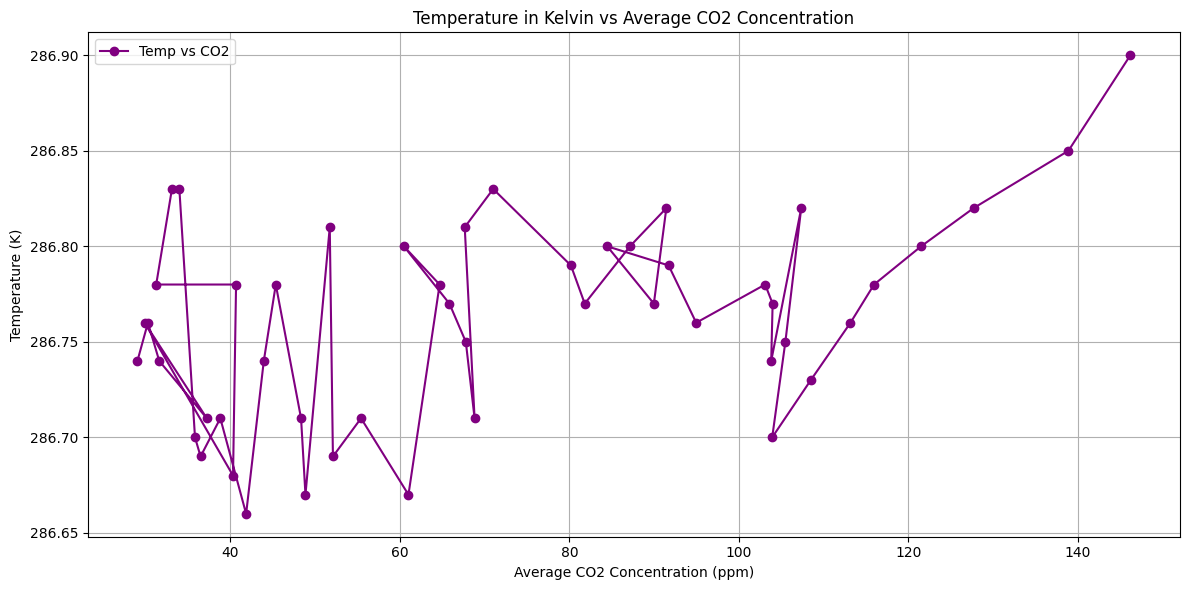

In [142]:
# Merge the DataFrames on the Year column
merged_data = pd.merge(averageco2, globaltemperature, left_on='YEAR', right_on='Year')

# Plot Temperature_in_Kelvin vs AVERAGE_CO2
plt.figure(figsize=(12, 6))
plt.plot(merged_data['AVERAGE_CO2'], merged_data['Temperature_in_Kelvin'], marker='o', linestyle='-', color='purple', label='Temp vs CO2')

# Adding titles and labels
plt.title('Temperature in Kelvin vs Average CO2 Concentration')
plt.xlabel('Average CO2 Concentration (ppm)')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<li>For the current carbon dioxide concentrations estimate the average temperature from Equator to the North Pole. </li>  

<h1 style="color: red;">Problem 3</h1>

<li>For the current carbon dioxide concentrations estimate the average temperature from Equator to the North Pole. </li>

**This Python code models the temperature evolution at the equator using an energy balance approach. It calculates incoming solar radiation, adjusts for albedo, and factors in outgoing radiation influenced by CO2 levels and heat transport. The temperature change is governed by a differential equation, which is solved using `solve_ivp` over time. The results are plotted to show how equatorial temperature evolves in relation to an average reference temperature (T_av).**

Time: 0.00, Net Inflow: 289.45, Outgoing: 205.66, Heat Transport: 53.19
Time: 0.02, Net Inflow: 289.45, Outgoing: 210.95, Heat Transport: 44.73
Time: 0.02, Net Inflow: 289.45, Outgoing: 210.07, Heat Transport: 46.14
Time: 0.02, Net Inflow: 289.45, Outgoing: 211.86, Heat Transport: 43.27
Time: 0.07, Net Inflow: 289.45, Outgoing: 220.96, Heat Transport: 28.71
------------------------------------------------------------------------------------------------------------------------


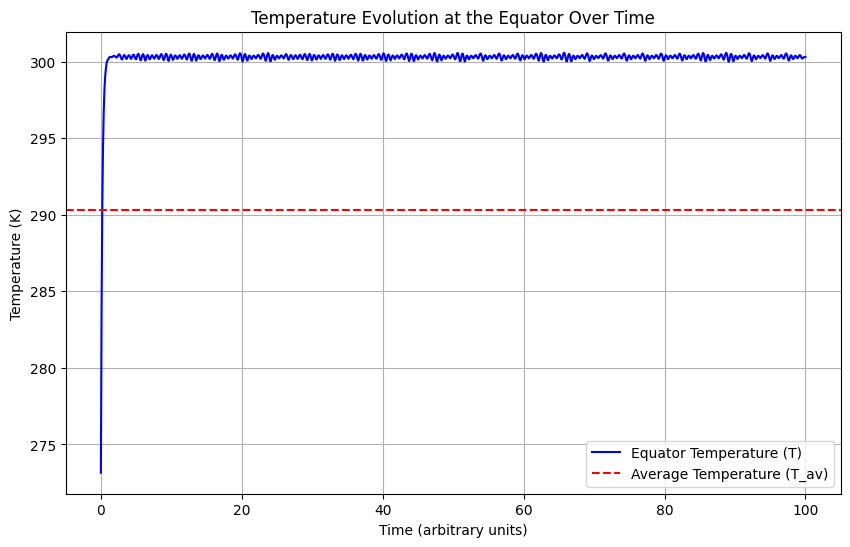

In [55]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
Q = 343  # Average incoming solar radiation in W/m^2
T_c = 263.15  # Critical temperature at the ice-land boundary in Kelvin
y_c = 0.5  # Critical latitude (0 to 1 scale, 0 = Equator, 1 = North Pole)

# Albedo values
alpha_1 = 0.32  # Albedo in non-ice zone
alpha_2 = 0.62  # Albedo in ice zone

# Function to calculate incoming solar radiation based on latitude
def incoming_solar_radiation(y):
    return Q * (1 - 0.482 * ((3 * y**2 - 1) / 2))

# Albedo function based on latitude
def albedo(y):
    if y > y_c:
        return alpha_2  # Ice zone
    elif y < y_c:
        return alpha_1  # Non-ice zone
    else:
        return 0.47  # Interface zone

# Net incoming radiation calculation
def net_incoming_radiation(y):
    alpha_y = albedo(y)
    Q_L = incoming_solar_radiation(y)
    Q_n = (1 - alpha_y) * Q_L
    return Q_n

# Constants for outgoing radiation calculation
P_CO2 = 0.0426  # Partial pressure of current CO2 in kPa (420 ppm)
P_CO2_ref = 0.03  # Reference CO2 pressure in kPa (300 ppm)

# Calculate psi
def calculate_psi(P_CO2, P_CO2_ref):
    return np.log(P_CO2 / P_CO2_ref)

# Calculate A(psi)
def A(psi):
    return -326.4 + 9.161 * psi - 3.164 * psi**2 + 0.546 * psi**3

# Calculate B(psi)
def B(psi):
    return 1.953 - 0.04866 * psi + 0.01309 * psi**2 - 0.002577 * psi**3

# Calculate outgoing radiation I
def outgoing_radiation(T, P_CO2, P_CO2_ref):
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    A_value = A(psi_value)
    B_value = B(psi_value)
    return A_value + B_value * T

# Calculate heat transport coefficient C(psi)
def C(psi):
    return 1.6 * B(psi)  # Using the previously defined B(psi)

# Calculate the heat transport term D
def heat_transport(T_av, T_y, P_CO2, P_CO2_ref):
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    C_value = C(psi_value)
    D = C_value * (T_av - T_y)
    return D

# Governing equation
call_counter = 0  # Initialize a counter

def dTdt(t, T, y, T_av):
    global call_counter  # Use the global counter
    
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    alpha_y = albedo(y)
    
    # Incoming solar radiation
    Q_L = incoming_solar_radiation(y)
    
    # Net incoming radiation
    net_inflow = (1 - alpha_y) * Q_L
    
    # Outgoing radiation
    outgoing = outgoing_radiation(T[0], P_CO2, P_CO2_ref)
    
    # Heat transport
    transport = heat_transport(T_av, T[0], P_CO2, P_CO2_ref)

    # Print the calculated values for the first 5 calls
    if call_counter < 5:
        print(f'Time: {t:.2f}, Net Inflow: {net_inflow:.2f}, Outgoing: {outgoing:.2f}, Heat Transport: {transport:.2f}')
        call_counter += 1  # Increment the counter
    
    # Governing equation
    dT_dt = (net_inflow - outgoing + transport)  # R is assumed to be 1 for simplicity
    return [dT_dt]

# Initial condition: temperature at t=0 (equator temperature)
T_initial = 273.15  # Initial temperature at the equator (in Kelvin)
y_equator = 0  # Equator latitude

# Example average temperature (T_av)
T_av = 290.31  # Average temperature from Equator to North Pole

# Time span for the simulation
time_span = (0, 100)  # Time span (in arbitrary units)
time_eval = np.linspace(0, 100, 1000)  # Time points for the result

# Solve the ODE
solution = solve_ivp(dTdt, time_span, [T_initial], args=(y_equator, T_av), t_eval=time_eval)

# Extract the results
temperature_values = solution.y[0]  # Get the temperature over time
time_values = solution.t  # Get the corresponding time values

print("-" * 120)  # Line break

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_values, temperature_values, label="Equator Temperature (T)", color='b')
plt.axhline(T_av, color='r', linestyle='--', label="Average Temperature (T_av)")
plt.title('Temperature Evolution at the Equator Over Time')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True)
plt.show()

<h1 style="color: red;">Problem 4</h1> 

<li>Explore what happens when $CO_2$ concentrations double from the present value and a new equilibrium is achieved.</li>

**The code creates a simple climate model to study temperature changes at the equator over time. It defines constants for solar radiation, critical temperatures, and albedo values, along with functions to calculate incoming solar radiation and outgoing radiation influenced by CO₂ levels. The main differential equation, dTdt, models temperature changes by considering net incoming radiation, outgoing radiation, and heat transport. The simulation uses solve_ivp to solve the equation over a set time span, extracting temperature values for visualization. Additionally, it prints net inflow, outgoing radiation, and heat transport for the first five calculations. Overall, this model helps understand how equatorial temperatures evolve under different radiation and CO₂ conditions.**

Time: 0.00, Net Inflow: 289.45, Outgoing: 203.02, Heat Transport: 52.54
Time: 0.02, Net Inflow: 289.45, Outgoing: 208.25, Heat Transport: 44.18
Time: 0.02, Net Inflow: 289.45, Outgoing: 207.44, Heat Transport: 45.47
Time: 0.02, Net Inflow: 289.45, Outgoing: 209.23, Heat Transport: 42.59
Time: 0.07, Net Inflow: 289.45, Outgoing: 218.37, Heat Transport: 27.98
------------------------------------------------------------------------------------------------------------------------


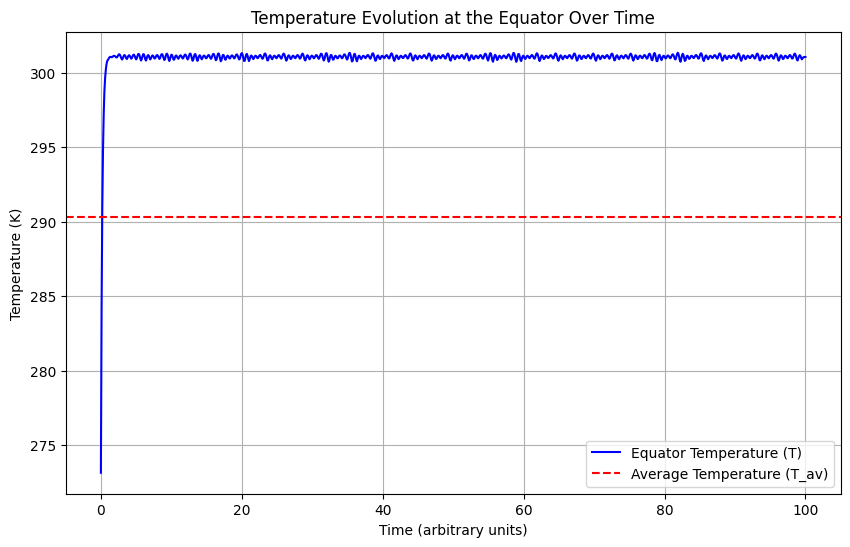

In [54]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
Q = 343  # Average incoming solar radiation in W/m^2
T_c = 263.15  # Critical temperature at the ice-land boundary in Kelvin
y_c = 0.5  # Critical latitude (0 to 1 scale, 0 = Equator, 1 = North Pole)

# Albedo values
alpha_1 = 0.32  # Albedo in non-ice zone
alpha_2 = 0.62  # Albedo in ice zone

# Function to calculate incoming solar radiation based on latitude
def incoming_solar_radiation(y):
    return Q * (1 - 0.482 * ((3 * y**2 - 1) / 2))

# Albedo function based on latitude
def albedo(y):
    if y > y_c:
        return alpha_2  # Ice zone
    elif y < y_c:
        return alpha_1  # Non-ice zone
    else:
        return 0.47  # Interface zone

# Net incoming radiation calculation
def net_incoming_radiation(y):
    alpha_y = albedo(y)
    Q_L = incoming_solar_radiation(y)
    Q_n = (1 - alpha_y) * Q_L
    return Q_n

# Constants for outgoing radiation calculation
P_CO2 = 0.0852  # Updated partial pressure of current CO2 in kPa
P_CO2_ref = 0.03  # Reference CO2 pressure in kPa (300 ppm)

# Calculate psi
def calculate_psi(P_CO2, P_CO2_ref):
    return np.log(P_CO2 / P_CO2_ref)

# Calculate A(psi)
def A(psi):
    return -326.4 + 9.161 * psi - 3.164 * psi**2 + 0.546 * psi**3

# Calculate B(psi)
def B(psi):
    return 1.953 - 0.04866 * psi + 0.01309 * psi**2 - 0.002577 * psi**3

# Calculate outgoing radiation I
def outgoing_radiation(T, P_CO2, P_CO2_ref):
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    A_value = A(psi_value)
    B_value = B(psi_value)
    return A_value + B_value * T

# Calculate heat transport coefficient C(psi)
def C(psi):
    return 1.6 * B(psi)  # Using the previously defined B(psi)

# Calculate the heat transport term D
def heat_transport(T_av, T_y, P_CO2, P_CO2_ref):
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    C_value = C(psi_value)
    D = C_value * (T_av - T_y)
    return D

# Governing equation
call_counter = 0  # Initialize a counter

def dTdt(t, T, y, T_av):
    global call_counter  # Use the global counter
    
    psi_value = calculate_psi(P_CO2, P_CO2_ref)
    alpha_y = albedo(y)
    
    # Incoming solar radiation
    Q_L = incoming_solar_radiation(y)
    
    # Net incoming radiation
    net_inflow = (1 - alpha_y) * Q_L
    
    # Outgoing radiation
    outgoing = outgoing_radiation(T[0], P_CO2, P_CO2_ref)
    
    # Heat transport
    transport = heat_transport(T_av, T[0], P_CO2, P_CO2_ref)

    # Print the calculated values for the first 5 calls
    if call_counter < 5:
        print(f'Time: {t:.2f}, Net Inflow: {net_inflow:.2f}, Outgoing: {outgoing:.2f}, Heat Transport: {transport:.2f}')
        call_counter += 1  # Increment the counter
    
    # Governing equation
    dT_dt = (net_inflow - outgoing + transport)  # R is assumed to be 1 for simplicity
    return [dT_dt]

# Initial condition: temperature at t=0 (equator temperature)
T_initial = 273.15  # Initial temperature at the equator (in Kelvin)
y_equator = 0  # Equator latitude

# Example average temperature (T_av)
T_av = 290.31  # Average temperature from Equator to North Pole

# Time span for the simulation
time_span = (0, 100)  # Time span (in arbitrary units)
time_eval = np.linspace(0, 100, 1000)  # Time points for the result

# Solve the ODE
solution = solve_ivp(dTdt, time_span, [T_initial], args=(y_equator, T_av), t_eval=time_eval)

# Extract the results
temperature_values = solution.y[0]  # Get the temperature over time
time_values = solution.t  # Get the corresponding time values

print("-" * 120)  # Line break

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_values, temperature_values, label="Equator Temperature (T)", color='b')
plt.axhline(T_av, color='r', linestyle='--', label="Average Temperature (T_av)")
plt.title('Temperature Evolution at the Equator Over Time')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Temperature (K)')
plt.legend()
plt.grid(True)
plt.show()

**When CO2 levels are stable, the Earth maintains an effective energy balance with adequate outgoing radiation and heat transport. However, doubling CO2 concentrations intensifies the greenhouse effect, trapping more heat in the atmosphere and reducing outgoing radiation. This results in decreased efficiency of heat transport and energy redistribution, ultimately leading to rising global temperatures.**

<h1 style="color: red;">Problem 5</h1> 

<li> Reflect the role of simple models such as these on understanding climate change </li>

<h3>Role of Simple Climate Model like this in Understanding Climate Change</h3>

**Energy Balance Framework**
- These models help us understand how solar energy coming in balances with heat going out.
- They illustrate the equilibrium between incoming solar radiation and outgoing terrestrial radiation.

**Effects of Greenhouse Gases**
- The models demonstrate how changes in CO₂ levels trap more heat in the atmosphere.
- Increased greenhouse gases lead to a rise in global temperatures due to enhanced greenhouse effect.

**Sensitivity Analysis**
- We can test how small changes in various factors (e.g., CO₂ levels, solar output) affect the climate system.
- This analysis helps identify which variables have the most significant impact on climate change.

**Feedback Loops**
- The models explain feedback mechanisms, such as how melting ice reduces albedo, leading to further warming.
- Positive feedback loops can accelerate climate change, while negative feedback loops may mitigate it.

**Scenario Simulations**
- They allow us to explore different future situations based on various CO₂ levels and climate policies.
- By simulating multiple scenarios, we can assess potential outcomes and inform decision-making.

**Educational Tool**
- These models serve as valuable educational tools, making it easier for people to grasp complex climate science concepts.
- They help raise awareness about climate change and its implications for society and the environment.

**Limitations**
- While useful, these models have some weaknesses due to their simplification of complex processes.
- To gain a more accurate understanding of climate dynamics, more advanced models are necessary.


**Conclusion**
- Simple climate models are important for understanding climate change, helping us see how energy works, the impact of greenhouse gases, and the need for better strategies to address climate issues.

<h1 style="color: red;">Project Summary</h1>

This project models the climate system to understand temperature changes across latitudes, specifically focusing on how solar radiation and CO₂ levels affect these temperatures.

### Key Constants

- Average Incoming Solar Radiation (Q): 343 W/m²
- Critical Temperature (T_c): 263.15 K
- Critical Latitude (y_c): 0.5 (where 0 = Equator, 1 = North Pole)

### Albedo Values

- Albedo in Non-Ice Zone (α₁): 0.32
- Albedo in Ice Zone (α₂): 0.62

### Key Formulas Used

1. Incoming Solar Radiation based on Latitude (y):  $Q_L = Qs(y) = Q\left(1 - 0.482\frac{(3y^2-1)}{2} \right)$

2. Albedo Function:
   \[
   \text{if } y > y_c: \alpha(y) = \alpha_2 \\
   \text{elif } y < y_c: \alpha(y) = \alpha_1 \\
   \text{else: } \alpha(y) = 0.47
   \]

3. Net Incoming Radiation: $Q_n = (1-\alpha(y))Q_L - (1-\alpha(y))Qs(y) = (1-\alpha(y))\times Q\left(1 - 0.482\frac{(3y^2-1)}{2} \right)$ 

4. Outgoing Radiation (I) based on CO₂ and Temperature: $ I = A(\psi) + B(\psi)*T $

- Where, $\psi$ is $ln \left(\frac{PCO_2}{PCO_{2,ref}} \right) $  Where, $PCO_2$ is the partial pressure of Carbon dioxide (kPa) and $PCO_{2,ref}$ is the reference partial pressure corresponding to a Carbon dioxide concentration of 300 ppm in (kPa).  The relationships are written as:

- $ A = -326.4 + 9.161 \psi - 3.164 \psi^2 + 0.546 \psi^3 $ (The units are in Watts/$m^2$)

- $ B = 1.953 - 0.04866 \psi + 0.01309 \psi^2  - 0.002577 \psi^3$ (The units are in Watts/(m$^2$.K))

5. Heat Transport Coefficient: $ C(\psi) = 1.6 \cdot B(\psi) $
   

6. Heat Transport Term: $ D = C(\psi) \left(T_{av} - T(y) \right) $


### Simulation Approach

- Initially, we set the partial pressure of CO₂ at 400 ppm and later doubled it to 800 ppm to observe climate changes.
- We gathered historical data on global CO₂ levels and temperatures from the pre-industrial era (1851 to 1900).
- This data allowed us to analyze the relationship between increasing CO₂ and rising global temperatures.

Using the `solve_ivp` function, we modeled how temperatures evolve over time by integrating net incoming radiation, outgoing radiation, and heat transport. Throughout the simulation, we printed key metrics—like net inflow, outgoing radiation, and heat transport—during the initial time points to gain insights into their behavior.

### Results

The results illustrate how latitudinal temperatures respond to variations in radiation and CO₂ levels, providing valuable insights into climate dynamics and the greenhouse effect. Overall, this project highlights the critical role of these parameters in understanding climate change and its implications.
